In [10]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [11]:
Batch_size = 2
Image_size = 256
Channels = 3
Epochs = 300


In [12]:
 dataset =tf.keras.preprocessing.image_dataset_from_directory(
    "Train",
    shuffle=True,
    image_size= (Image_size,Image_size)
)

Found 2190 files belonging to 2 classes.


In [13]:
class_name = dataset.class_names
class_name

['actinic keratosis', 'nevus']

(32, 256, 256, 3)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


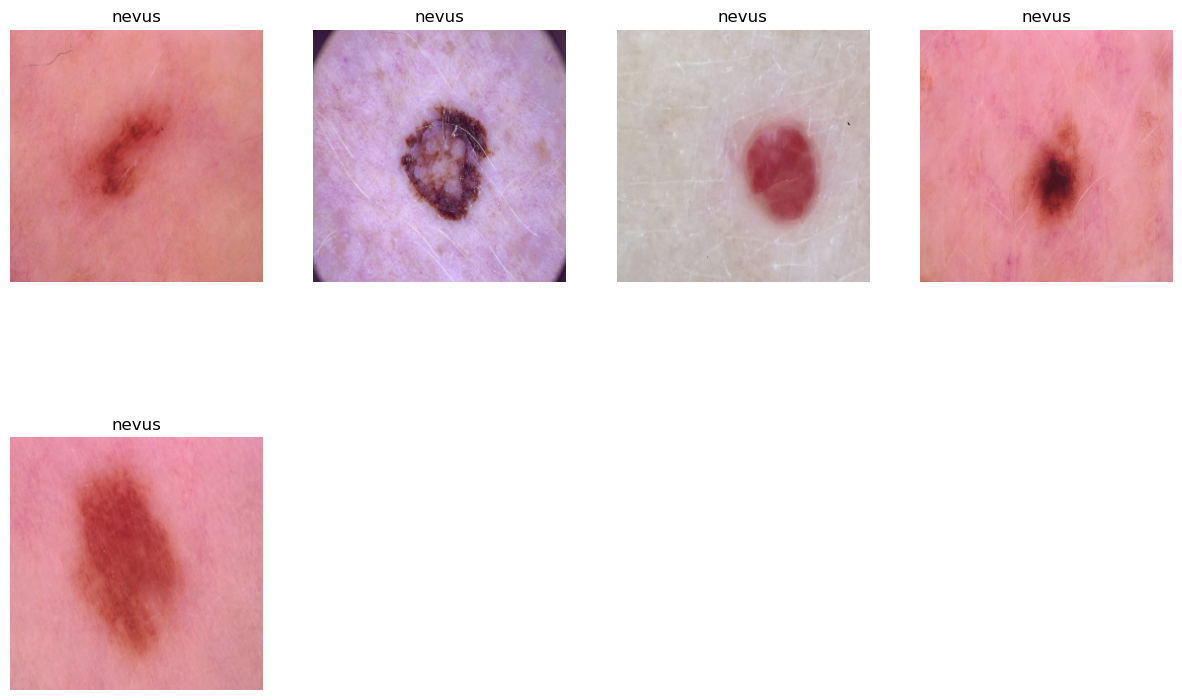

In [14]:
plt.figure(figsize=(15,15))
for image_batch , labels_batch in dataset.take(1):
    print (image_batch.shape)
    print(labels_batch.numpy())
    for i in range(5):
        ax = plt.subplot(3,4, i +1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")


In [15]:
80% ==> training
10% ==> Validation
10% Test


SyntaxError: invalid syntax (824230328.py, line 1)

In [ ]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_slip = 0.1, shuffle=True,shuffle_size = 10000):
    assert(train_split + val_split+test_slip) ==1
    ds_size = len(ds)
    if(shuffle):
        ds = ds.shuffle(shuffle_size, seed =12)
    
    train_size = int(train_split*ds_size)
    validation_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(validation_size)
    test_ds = ds.skip(train_size).take(validation_size)
    
    return train_ds, val_ds, test_ds

In [16]:
 train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [17]:
train_ds =train_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds =val_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(10000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [18]:
resize_and_resacele = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(Image_size,Image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [19]:
data_augmentaion = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [20]:
Channels

3

In [21]:
input_shape = (Batch_size,Image_size,Image_size,Channels)
n_class = 2
model = models.Sequential([
    resize_and_resacele,
    data_augmentaion,
    layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 ,activation='relu'),
    layers.Dense(n_class, activation= 'softmax')
])
model.build(input_shape=input_shape)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (2, 256, 256, 3)          0         
                                                                 
 sequential_1 (Sequential)   (2, 256, 256, 3)          0         
                                                                 
 conv2d (Conv2D)             (2, 254, 254, 32)         896       
                                                                 
 max_pooling2d (MaxPooling2D  (2, 127, 127, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (2, 125, 125, 32)         9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (2, 62, 62, 32)          0         
 2D)                                                  

In [23]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']  
)

In [24]:
..0000history = model.fit(
    train_ds,
    batch_size=Batch_size,
    validation_data= val_ds,
    verbose=1,
    epochs = Epochs
)

Epoch 1/300
55/55 [==============================] - 83s 1s/step - loss: 0.2929 - accuracy: 0.9305 - val_loss: 0.3197 - val_accuracy: 0.9062
Epoch 2/300
55/55 [==============================] - 53s 958ms/step - loss: 0.2254 - accuracy: 0.9466 - val_loss: 0.3109 - val_accuracy: 0.9062
Epoch 3/300
55/55 [==============================] - 54s 981ms/step - loss: 0.2132 - accuracy: 0.9466 - val_loss: 0.3122 - val_accuracy: 0.9062
Epoch 4/300
55/55 [==============================] - 53s 966ms/step - loss: 0.2127 - accuracy: 0.9466 - val_loss: 0.3452 - val_accuracy: 0.9062
Epoch 5/300
55/55 [==============================] - 58s 1s/step - loss: 0.1897 - accuracy: 0.9466 - val_loss: 0.2391 - val_accuracy: 0.9062
Epoch 6/300
55/55 [==============================] - 53s 946ms/step - loss: 0.1767 - accuracy: 0.9466 - val_loss: 0.2311 - val_accuracy: 0.9062
Epoch 7/300
55/55 [==============================] - 49s 884ms/step - loss: 0.1706 - accuracy: 0.9466 - val_loss: 0.3017 - val_accuracy: 0.906

55/55 [==============================] - 78s 1s/step - loss: 0.1053 - accuracy: 0.9546 - val_loss: 0.1343 - val_accuracy: 0.9427
Epoch 116/300
55/55 [==============================] - 75s 1s/step - loss: 0.1004 - accuracy: 0.9558 - val_loss: 0.1173 - val_accuracy: 0.9531
Epoch 117/300
55/55 [==============================] - 76s 1s/step - loss: 0.1012 - accuracy: 0.9541 - val_loss: 0.1347 - val_accuracy: 0.9479
Epoch 118/300
55/55 [==============================] - 76s 1s/step - loss: 0.0980 - accuracy: 0.9569 - val_loss: 0.1135 - val_accuracy: 0.9688
Epoch 119/300
55/55 [==============================] - 75s 1s/step - loss: 0.1004 - accuracy: 0.9569 - val_loss: 0.1091 - val_accuracy: 0.9635
Epoch 120/300
55/55 [==============================] - 76s 1s/step - loss: 0.0972 - accuracy: 0.9587 - val_loss: 0.1200 - val_accuracy: 0.9531
Epoch 121/300
55/55 [==============================] - 64s 1s/step - loss: 0.1021 - accuracy: 0.9541 - val_loss: 0.1139 - val_accuracy: 0.9583
Epoch 122/300

Epoch 172/300
55/55 [==============================] - 55s 1s/step - loss: 0.0931 - accuracy: 0.9598 - val_loss: 0.1341 - val_accuracy: 0.9688
Epoch 173/300
55/55 [==============================] - 54s 982ms/step - loss: 0.0840 - accuracy: 0.9621 - val_loss: 0.1611 - val_accuracy: 0.9375
Epoch 174/300
55/55 [==============================] - 55s 1s/step - loss: 0.0858 - accuracy: 0.9621 - val_loss: 0.1355 - val_accuracy: 0.9635
Epoch 175/300
55/55 [==============================] - 54s 984ms/step - loss: 0.0918 - accuracy: 0.9621 - val_loss: 0.1544 - val_accuracy: 0.9583
Epoch 176/300
55/55 [==============================] - 53s 967ms/step - loss: 0.0930 - accuracy: 0.9615 - val_loss: 0.1693 - val_accuracy: 0.9375
Epoch 177/300
55/55 [==============================] - 54s 973ms/step - loss: 0.0907 - accuracy: 0.9621 - val_loss: 0.1912 - val_accuracy: 0.9375
Epoch 178/300
55/55 [==============================] - 54s 985ms/step - loss: 0.0864 - accuracy: 0.9610 - val_loss: 0.1988 - val_a

Epoch 285/300
55/55 [==============================] - 74s 1s/step - loss: 0.0670 - accuracy: 0.9696 - val_loss: 0.0895 - val_accuracy: 0.9635
Epoch 286/300
55/55 [==============================] - 74s 1s/step - loss: 0.0742 - accuracy: 0.9684 - val_loss: 0.1068 - val_accuracy: 0.9427
Epoch 287/300
55/55 [==============================] - 74s 1s/step - loss: 0.0669 - accuracy: 0.9679 - val_loss: 0.1010 - val_accuracy: 0.9427
Epoch 288/300
55/55 [==============================] - 74s 1s/step - loss: 0.0644 - accuracy: 0.9696 - val_loss: 0.1005 - val_accuracy: 0.9635
Epoch 289/300
55/55 [==============================] - 75s 1s/step - loss: 0.0686 - accuracy: 0.9696 - val_loss: 0.1120 - val_accuracy: 0.9375
Epoch 290/300
55/55 [==============================] - 75s 1s/step - loss: 0.0813 - accuracy: 0.9615 - val_loss: 0.1179 - val_accuracy: 0.9479
Epoch 291/300
55/55 [==============================] - 75s 1s/step - loss: 0.0676 - accuracy: 0.9690 - val_loss: 0.1253 - val_accuracy: 0.9740

In [25]:
model.evaluate(test_ds)

6/6 [==============================] - 10s 316ms/step - loss: 0.0958 - accuracy: 0.9844


[0.0957561507821083, 0.984375]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

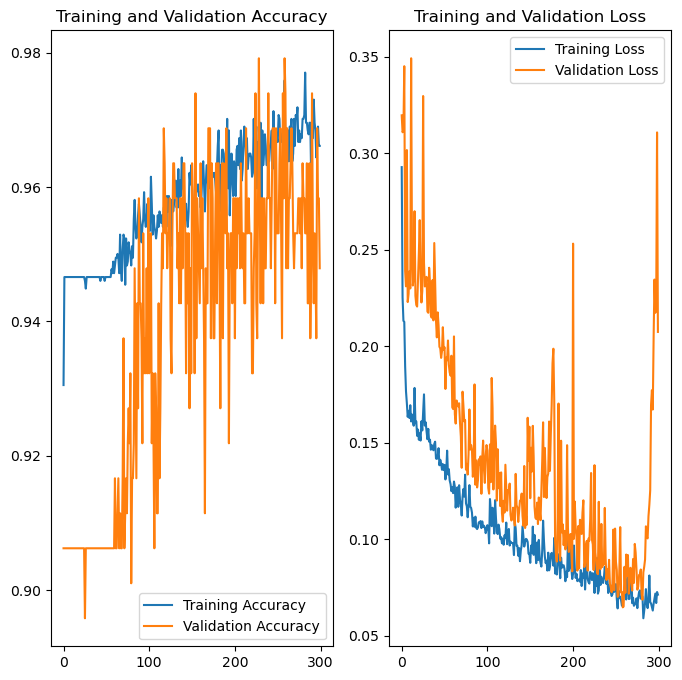

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

First Image To Preddict
Label: 1
1/1 [==============================] - 1s 899ms/step
predicted label: nevus


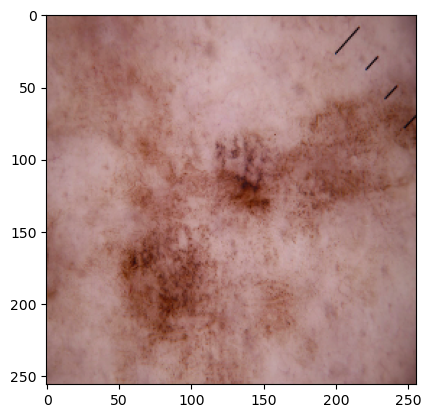

In [28]:
import numpy as np
for image_batch , labels_batch in dataset.take(1):
    imges = image_batch[1].numpy().astype("uint8")
    
    print("First Image To Preddict")
    
    plt.imshow(imges)
    print("Label:",labels_batch[0].numpy())
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[2])])
    
    

In [29]:
import os
model_vesion = max([int(i) for i in (os.listdir("../Train_Model")+[0])]) + 1
model.save(f"../Train_Model/{model_vesion}")

INFO:tensorflow:Assets written to: ../Train_Model/2\assets


INFO:tensorflow:Assets written to: ../Train_Model/2\assets
